# Importing Libraries and data loading

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set(context="notebook", palette="dark")

In [2]:
df_movies = pd.read_csv("../processed_data/movies.csv")
df_movies.head(2)

budget    id original_language  \
0  30000000.0   862                en   
1  65000000.0  8844                en   

                                            overview  popularity release_date  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   1995-10-30   
1  When siblings Judy and Peter discover an encha...   17.015539   1995-12-15   

       revenue  runtime      title  vote_average  ...            collection  \
0  373554033.0     81.0  Toy Story           7.7  ...  Toy Story Collection   
1  262797249.0    104.0    Jumanji           6.9  ...                   NaN   

                          genres_list spoken_languages_list  \
0   ['Animation', 'Comedy', 'Family']                ['en']   
1  ['Adventure', 'Fantasy', 'Family']          ['en', 'fr']   

                           production_companies_list  \
0                        ['Pixar Animation Studios']   
1  ['TriStar Pictures', 'Teitler Film', 'Intersco...   

  production_countries_list release_year  return  release_month release_day  \
0                    ['US']         1995   12.45        October      Monday   
1                    ['US']         1995    4.04       December      Friday   

           directors  
0  ['John Lasseter']  
1   ['Joe Johnston']  

[2 rows x 21 columns]

Every time we load a file, pandas interprets columns with lists as strings, so they need to be evaluated with ast library to be converted to lists.

In [3]:
df_movies["genres_list"] = [x if pd.isnull(x) else ast.literal_eval(x) for x in df_movies["genres_list"]]
df_movies["directors"] = [x if pd.isnull(x) else ast.literal_eval(x) for x in df_movies["directors"]]
df_movies["spoken_languages_list"] = [x if pd.isnull(x) else ast.literal_eval(x) for x in df_movies["spoken_languages_list"]]
df_movies["production_countries_list"] = [x if pd.isnull(x) else ast.literal_eval(x) for x in df_movies["production_countries_list"]]
df_movies["production_companies_list"] = [x if pd.isnull(x) else ast.literal_eval(x) for x in df_movies["production_companies_list"]]

# Analysing the complete dataset

Only movies dataset will be analyzed because it has the attributes that are goint to feed the recommendatio model.

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   budget                     45345 non-null  float64
 1   id                         45345 non-null  int64  
 2   original_language          45334 non-null  object 
 3   overview                   44404 non-null  object 
 4   popularity                 45345 non-null  float64
 5   release_date               45345 non-null  object 
 6   revenue                    45345 non-null  float64
 7   runtime                    45099 non-null  float64
 8   title                      45345 non-null  object 
 9   vote_average               45345 non-null  float64
 10  vote_count                 45345 non-null  float64
 11  collection                 4485 non-null   object 
 12  genres_list                45345 non-null  object 
 13  spoken_languages_list      45345 non-null  obj

In [5]:
# there a lot of null values in collectios but that's fine because only some movies belongs to a series of films

df_movies.isna().mean() # sum() would give the total amount of null values but mean() give us the proportion

budget                       0.000000
id                           0.000000
original_language            0.000243
overview                     0.020752
popularity                   0.000000
release_date                 0.000000
revenue                      0.000000
runtime                      0.005425
title                        0.000000
vote_average                 0.000000
vote_count                   0.000000
collection                   0.901092
genres_list                  0.000000
spoken_languages_list        0.000000
production_companies_list    0.000000
production_countries_list    0.000000
release_year                 0.000000
return                       0.000000
release_month                0.000000
release_day                  0.000000
directors                    0.000000
dtype: float64

In [6]:
df_movies.drop(columns="id").describe()

budget    popularity       revenue       runtime  vote_average  \
count  4.534500e+04  45345.000000  4.534500e+04  45099.000000  45345.000000   
mean   4.232673e+06      2.926248  1.123390e+07     94.179893      5.624320   
std    1.744391e+07      6.011023  6.441058e+07     38.346636      1.915178   
min    0.000000e+00      0.000000  0.000000e+00      0.000000      0.000000   
25%    0.000000e+00      0.388826  0.000000e+00     85.000000      5.000000   
50%    0.000000e+00      1.130269  0.000000e+00     95.000000      6.000000   
75%    0.000000e+00      3.689610  0.000000e+00    107.000000      6.800000   
max    3.800000e+08    547.488298  2.787965e+09   1256.000000     10.000000   

         vote_count  release_year        return  
count  45345.000000  45345.000000  4.534500e+04  
mean     110.137722   1991.882280  6.604937e+02  
std      491.904428     24.053016  7.471882e+04  
min        0.000000   1874.000000  0.000000e+00  
25%        3.000000   1978.000000  0.000000e+00  
50%       10.000000   2001.000000  0.000000e+00  
75%       34.000000   2010.000000  0.000000e+00  
max    14075.000000   2020.000000  1.239638e+07

In [7]:
numerical_columns = df_movies.select_dtypes(include=["float","int"])
numerical_columns

budget      id  popularity      revenue  runtime  vote_average  \
0      30000000.0     862   21.946943  373554033.0     81.0           7.7   
1      65000000.0    8844   17.015539  262797249.0    104.0           6.9   
2             0.0   15602   11.712900          0.0    101.0           6.5   
3      16000000.0   31357    3.859495   81452156.0    127.0           6.1   
4             0.0   11862    8.387519   76578911.0    106.0           5.7   
...           ...     ...         ...          ...      ...           ...   
45340         0.0   30840    5.683753          0.0    104.0           5.7   
45341         0.0  111109    0.178241          0.0    360.0           9.0   
45342         0.0   67758    0.903007          0.0     90.0           3.8   
45343         0.0  227506    0.003503          0.0     87.0           0.0   
45344         0.0  461257    0.163015          0.0     75.0           0.0   

       vote_count  release_year  return  
0          5415.0          1995   12.45  
1          2413.0          1995    4.04  
2            92.0          1995    0.00  
3            34.0          1995    5.09  
4           173.0          1995    0.00  
...           ...           ...     ...  
45340        26.0          1991    0.00  
45341         3.0          2011    0.00  
45342         6.0          2003    0.00  
45343         0.0          1917    0.00  
45344         0.0          2017    0.00  

[45345 rows x 9 columns]

In [8]:
categorical_columns = df_movies.select_dtypes(include=["object","string"])
categorical_columns

original_language                                           overview  \
0                    en  Led by Woody, Andy's toys live happily in his ...   
1                    en  When siblings Judy and Peter discover an encha...   
2                    en  A family wedding reignites the ancient feud be...   
3                    en  Cheated on, mistreated and stepped on, the wom...   
4                    en  Just when George Banks has recovered from his ...   
...                 ...                                                ...   
45340                en  Yet another version of the classic epic, with ...   
45341                tl  An artist struggles to finish his work while a...   
45342                en  When one of her hits goes wrong, a professiona...   
45343                en  In a small town live two brothers, one a minis...   
45344                en  50 years after decriminalisation of homosexual...   

      release_date                        title  \
0       1995-10-30                    Toy Story   
1       1995-12-15                      Jumanji   
2       1995-12-22             Grumpier Old Men   
3       1995-12-22            Waiting to Exhale   
4       1995-02-10  Father of the Bride Part II   
...            ...                          ...   
45340   1991-05-13                   Robin Hood   
45341   2011-11-17          Century of Birthing   
45342   2003-08-01                     Betrayal   
45343   1917-10-21             Satan Triumphant   
45344   2017-06-09                     Queerama   

                           collection                   genres_list  \
0                Toy Story Collection   [Animation, Comedy, Family]   
1                                 NaN  [Adventure, Fantasy, Family]   
2           Grumpy Old Men Collection             [Romance, Comedy]   
3                                 NaN      [Comedy, Drama, Romance]   
4      Father of the Bride Collection                      [Comedy]   
...                               ...                           ...   
45340                             NaN      [Drama, Action, Romance]   
45341                             NaN                       [Drama]   
45342                             NaN     [Action, Drama, Thriller]   
45343                             NaN                            []   
45344                             NaN                            []   

      spoken_languages_list  \
0                      [en]   
1                  [en, fr]   
2                      [en]   
3                      [en]   
4                      [en]   
...                     ...   
45340                  [en]   
45341                  [tl]   
45342                  [en]   
45343                    []   
45344                  [en]   

                               production_companies_list  \
0                              [Pixar Animation Studios]   
1      [TriStar Pictures, Teitler Film, Interscope Co...   
2                         [Warner Bros., Lancaster Gate]   
3               [Twentieth Century Fox Film Corporation]   
4           [Sandollar Productions, Touchstone Pictures]   
...                                                  ...   
45340  [Westdeutscher Rundfunk (WDR), Working Title F...   
45341                                      [Sine Olivia]   
45342                          [American World Pictures]   
45343                                        [Yermoliev]   
45344                                                 []   

      production_countries_list release_month release_day           directors  
0                          [US]       octubre       lunes     [John Lasseter]  
1                          [US]     diciembre     viernes      [Joe Johnston]  
2                          [US]     diciembre     viernes     [Howard Deutch]  
3                          [US]     diciembre     viernes   [Forest Whitaker]  
4                          [US]       febrero     viernes     [Charles Shyer]  
...                         .

## Distribution and Outliers

### Runtime

Text(0.5, 1.0, 'Distribution of runtime')

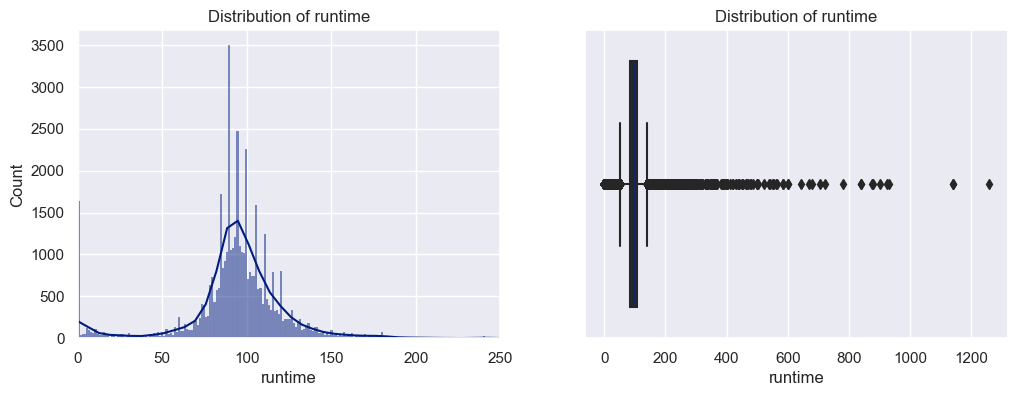

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df_movies, x="runtime", ax=ax[0], kde=True)
ax[0].set_xlabel('runtime')
ax[0].set_title('Distribution of runtime')
ax[0].set_xlim(0, 250)

sns.boxplot(data=df_movies, x="runtime", ax=ax[1])
ax[1].set_xlabel('runtime')
ax[1].set_title('Distribution of runtime')

Runtime has a lot of outliers, like it shows in the boxplot but if we limit the horizontal axis in the histogram, it's possible to see the normal distribution.

### Votes and popularity

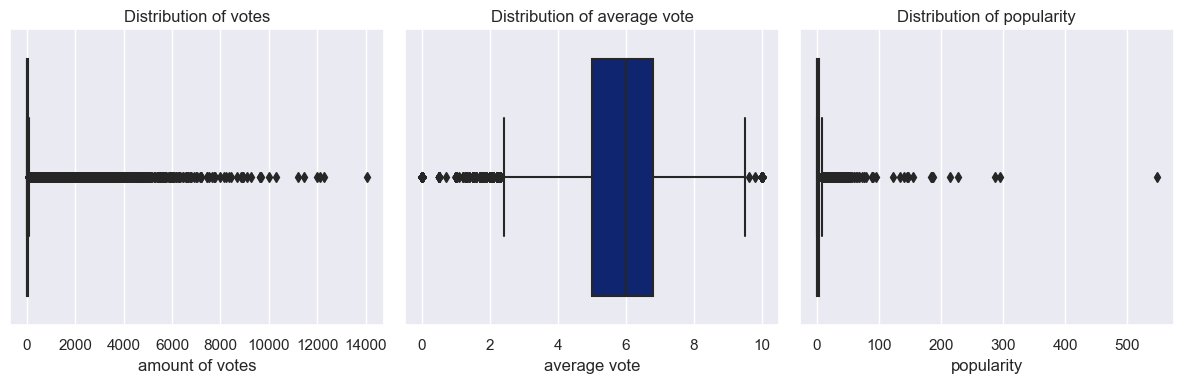

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(data=df_movies, x="vote_count", ax=ax[0])
ax[0].set_xlabel('amount of votes')
ax[0].set_title('Distribution of votes')

sns.boxplot(data=df_movies, x="vote_average", ax=ax[1])
ax[1].set_xlabel('average vote')
ax[1].set_title('Distribution of average vote')

sns.boxplot(data=df_movies, x="popularity", ax=ax[2])
ax[2].set_xlabel('popularity')
ax[2].set_title('Distribution of popularity')

plt.tight_layout()
plt.show()

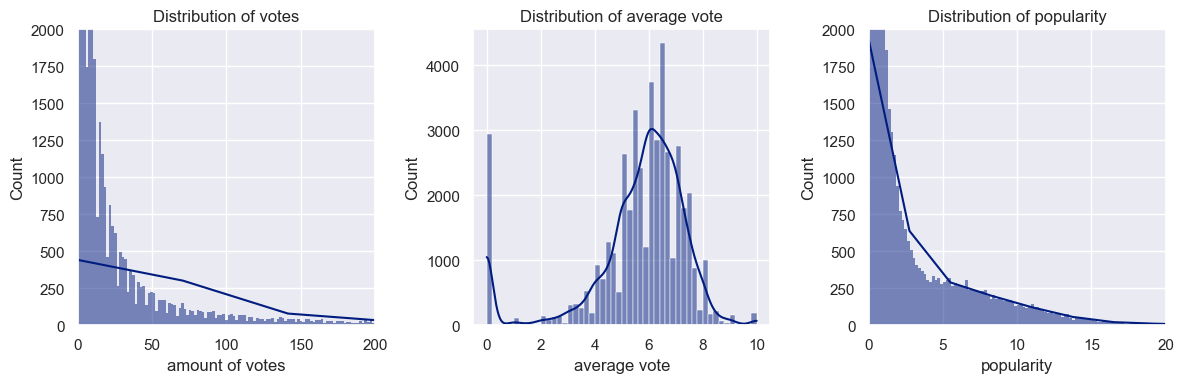

In [10]:

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=df_movies, x="vote_count", ax=ax[0], kde=True)
ax[0].set_xlabel('amount of votes')
ax[0].set_title('Distribution of votes')
ax[0].set_xlim(0, 200)
ax[0].set_ylim(0, 2000)

sns.histplot(data=df_movies, x="vote_average", ax=ax[1], bins=50, kde=True)
ax[1].set_xlabel('average vote')
ax[1].set_title('Distribution of average vote')

sns.histplot(data=df_movies, x="popularity", ax=ax[2], kde=True)
ax[2].set_xlabel('popularity')
ax[2].set_title('Distribution of popularity')
ax[2].set_xlim(0, 20)
ax[2].set_ylim(0, 2000)

plt.tight_layout()
plt.show()

Average vote has a normal distribution but that doesn't apply to vote count and popularity, most of the movies in the dataset are barely known.

We need to extract the objects from the columns with list to see how many films by category.

In [11]:
# to get how many movies are per genre

genres = []
for genres_list in df_movies['genres_list']: # for every row
    for genre in genres_list: # for every genre in every row
        genres.append(genre) # add that genre to the list

freq_genres = pd.Series(genres).value_counts()
freq_genres

Drama              20234
Comedy             13175
Thriller            7614
Romance             6728
Action              6588
Horror              4668
Crime               4302
Documentary         3919
Adventure           3488
Science Fiction     3037
Family              2765
Mystery             2461
Fantasy             2309
Animation           1928
Foreign             1618
Music               1597
History             1397
War                 1322
Western             1042
TV Movie             765
Name: count, dtype: int64

Repeat the last algorith to the other columns.

In [12]:
languages = []
for languages_list in df_movies['spoken_languages_list']:
    for language in languages_list:
        languages.append(language)

freq_languages = pd.Series(languages).value_counts()


In [13]:
countries = []
for countries_list in df_movies['production_countries_list']:
    for country in countries_list:
        countries.append(country)

freq_countries = pd.Series(countries).value_counts()

In [14]:
companies = []
for companies_list in df_movies['production_companies_list']:
    for companie in companies_list:
        companies.append(companie)

freq_companies = pd.Series(companies).value_counts()

In [15]:
# need the filter to plot them because there are a lot of languages, companies and countries with low frequecy

filter_languages = freq_languages[freq_languages >= 1500]
filter_countries = freq_countries[freq_countries >= 1500]
filter_companies = freq_companies[freq_companies >= 250]


### Distribution by category

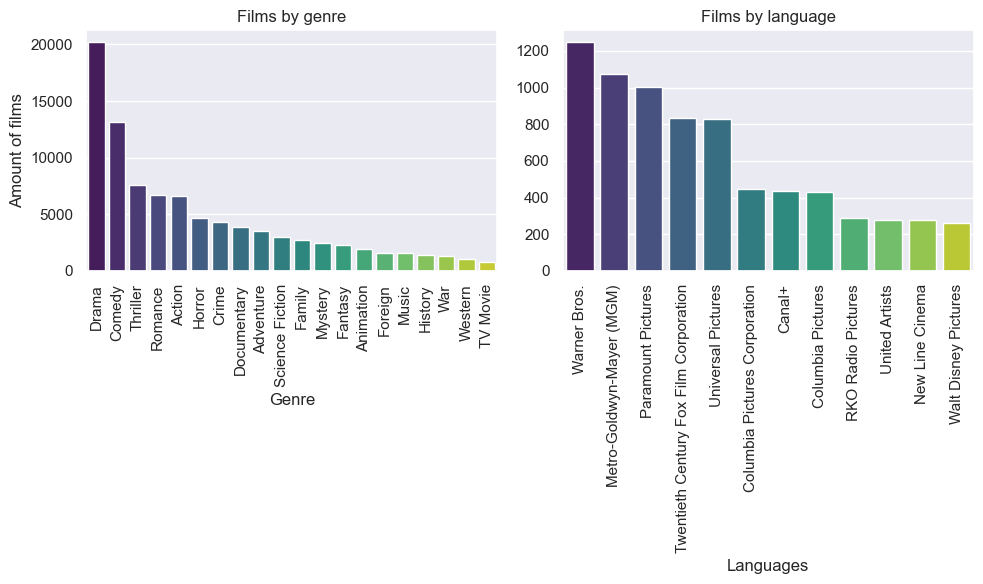

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=False)

sns.barplot(x=freq_genres.index, y=freq_genres.values, ax=ax[0], palette='viridis')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Amount of films')
ax[0].set_title('Films by genre')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.barplot(x=filter_companies.index, y=filter_companies.values, ax=ax[1], palette='viridis')
ax[1].set_xlabel('Languages')
ax[1].set_title('Films by language')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


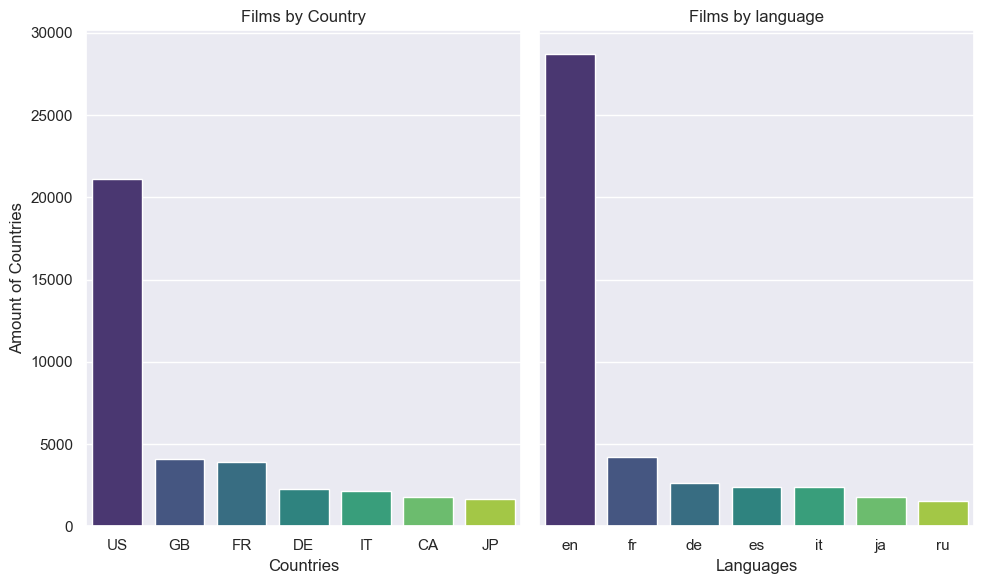

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

sns.barplot(x=filter_countries.index, y=filter_countries.values, ax=ax[0], palette='viridis')
ax[0].set_xlabel('Countries')
ax[0].set_ylabel('Amount of Countries')
ax[0].set_title('Films by Country')

sns.barplot(x=filter_languages.index, y=filter_languages.values, ax=ax[1], palette='viridis')
ax[1].set_xlabel('Languages')
ax[1].set_title('Films by language')

plt.tight_layout()
plt.show()


Most common attributes for movies are: Drama, Comedy, filmed in the US, in english, by companies like Warner and MGM.

### Distribution by period of time

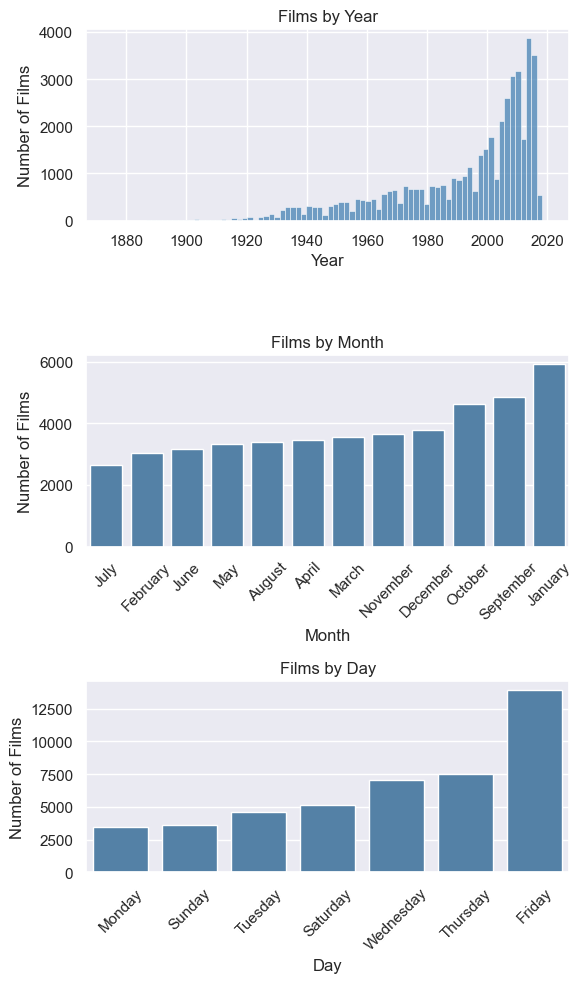

In [3]:
month_order = df_movies['release_month'].value_counts().sort_values().index
day_order = df_movies['release_day'].value_counts().sort_values().index


fig, ax = plt.subplots(3, 1, figsize=(6, 10), sharey=False)

sns.histplot(data=df_movies, x="release_year", ax=ax[0], color="steelblue")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Films')
ax[0].set_title('Films by Year')

sns.countplot(data=df_movies, x="release_month", ax=ax[1], order=month_order, color="steelblue")
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Films')
ax[1].set_title('Films by Month')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

sns.countplot(data=df_movies, x="release_day", ax=ax[2], order=day_order, color="steelblue")
ax[2].set_xlabel('Day')
ax[2].set_ylabel('Number of Films')
ax[2].set_title('Films by Day')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


Most of the movies of this dataset were released after 2000 and the most popular days to release a movie are friday and thursday, which makes sense because those are days that are closer to the weekend.

### Distribution by financial information

The information available to calculate return is not reliable and the following figures show it.

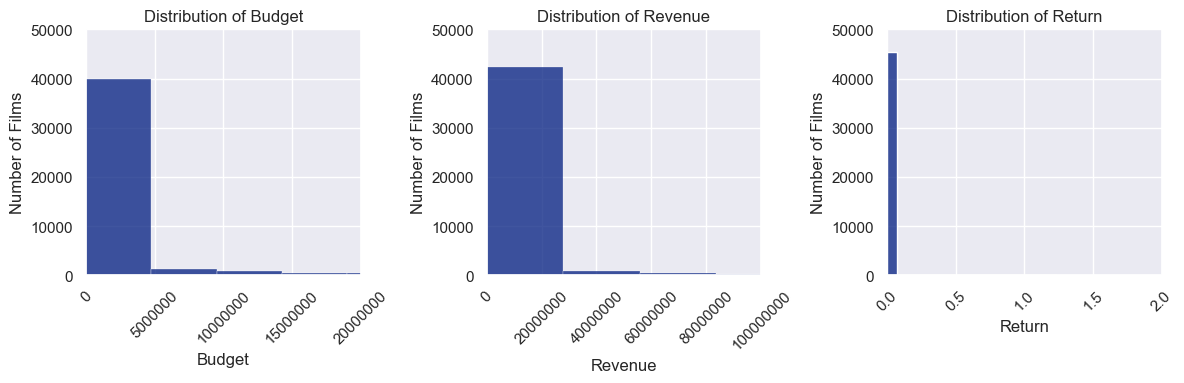

In [112]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=df_movies, x="budget", ax=ax[0], bins=80)
ax[0].set_xlabel('Budget')
ax[0].set_ylabel('Number of Films')
ax[0].set_title('Distribution of Budget')
ax[0].set_xlim(0, 20000000)
ax[0].set_ylim(0, 50000)
ax[0].ticklabel_format(style='plain', axis='both')
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.histplot(data=df_movies, x="revenue", ax=ax[1], bins=100)
ax[1].set_xlabel('Revenue')
ax[1].set_ylabel('Number of Films')
ax[1].set_title('Distribution of Revenue')
ax[1].set_xlim(0, 100000000)
ax[1].set_ylim(0, 50000)
ax[1].ticklabel_format(style='plain', axis='both')
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


sns.histplot(data=df_movies, x="return", ax=ax[2])
ax[2].set_xlabel('Return')
ax[2].set_ylabel('Number of Films')
ax[2].set_title('Distribution of Return')
ax[2].set_xlim(0, 20000000)
ax[2].set_ylim(0, 50000)
ax[2].set_xticks(ax[2].get_xticks())
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [86]:
(df_movies["return"] == 0).sum()

40032

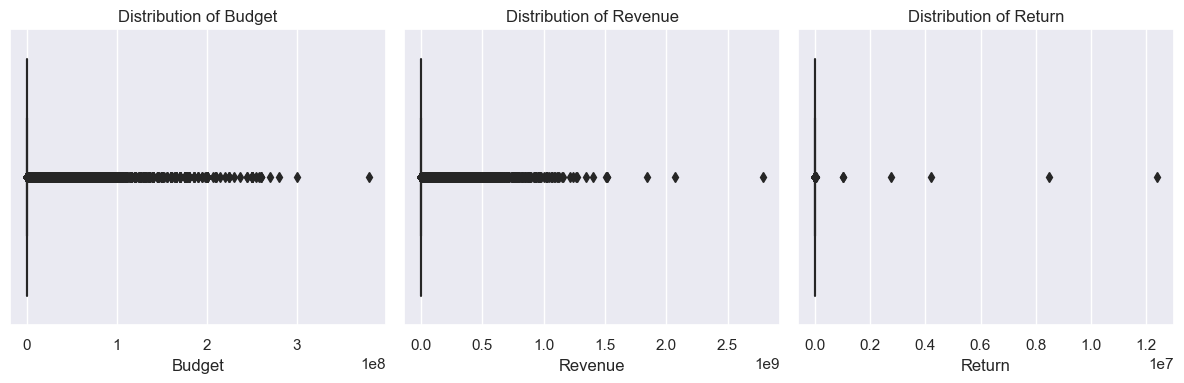

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(data=df_movies, x="budget", ax=ax[0])
ax[0].set_xlabel('Budget')
ax[0].set_title('Distribution of Budget')

sns.boxplot(data=df_movies, x="revenue", ax=ax[1])
ax[1].set_xlabel('Revenue')
ax[1].set_title('Distribution of Revenue')

sns.boxplot(data=df_movies, x="return", ax=ax[2])
ax[2].set_xlabel('Return')
ax[2].set_title('Distribution of Return')

plt.tight_layout()
plt.show()

The lasts figures shows there is a lot of concentration in low values. This is, mainly, because of these two reasons:
- High budget and high revenues movies are anomalies if we compare them with the all the movies released in a given period.

- There are some non-realistic values for budget (too low) and reveneu (too high) that affect the distribution. There is an example:

C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_3584\3862136122.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


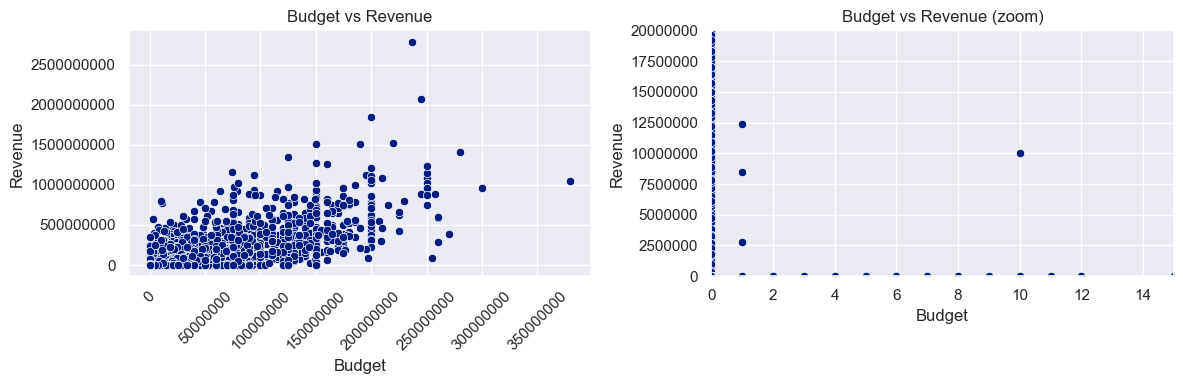

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df_movies, x="budget", y="revenue", ax=ax[0])
ax[0].set_xlabel("Budget")
ax[0].set_ylabel("Revenue")
ax[0].set_title("Budget vs Revenue")
ax[0].ticklabel_format(style='plain', axis='both')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.scatterplot(data=df_movies, x="budget", y="revenue", ax=ax[1])
ax[1].set_xlabel("Budget")
ax[1].set_ylabel("Revenue")
ax[1].set_title("Budget vs Revenue (zoom)")
ax[1].set_xlim(0, 15)
ax[1].set_ylim(0, 20000000)
ax[1].ticklabel_format(style='plain', axis='both')

plt.tight_layout()
plt.show()

As its shown in the second graph in the figure above, there are a lot of movies with zero budget and some movies with low budget and high revenue that are, at least, suspicious. The amount of incorrect values in budget, revenue and return are so hight that taking these attributes into the recommendation model is not worthy.

## Correlation

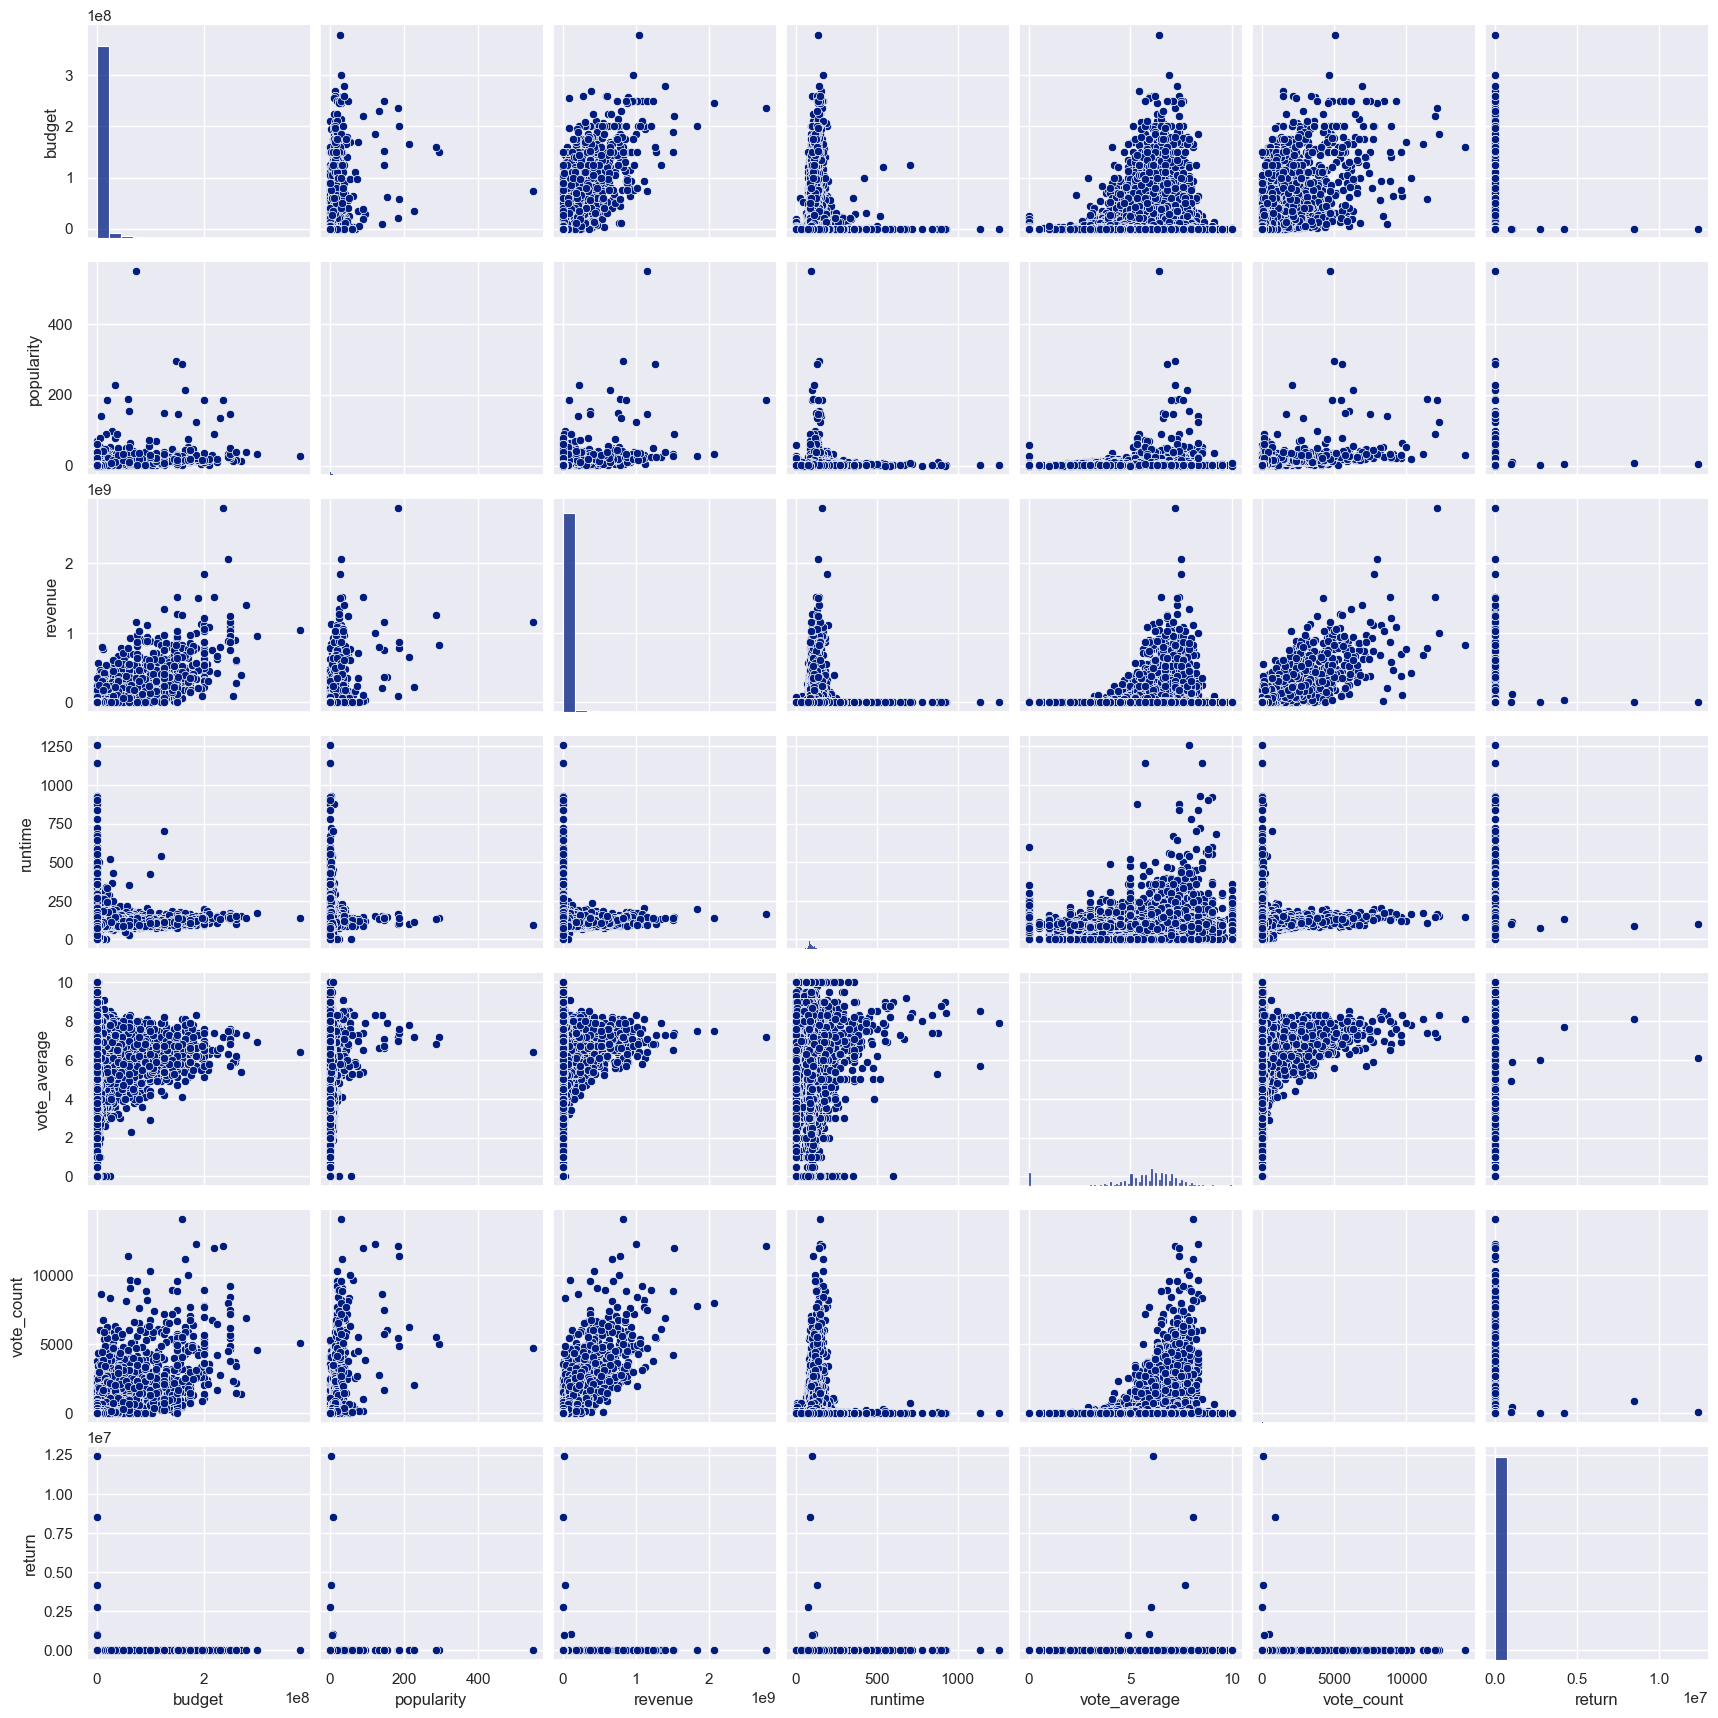

In [22]:
sns.pairplot(data=df_movies.drop(columns=["id", "release_year"]))

In [6]:
numerical_columns = df_movies.select_dtypes(include=["float","int"])

In [24]:
df_movies_corr = df_movies[numerical_columns.columns].drop(columns=["id", "release_year"])

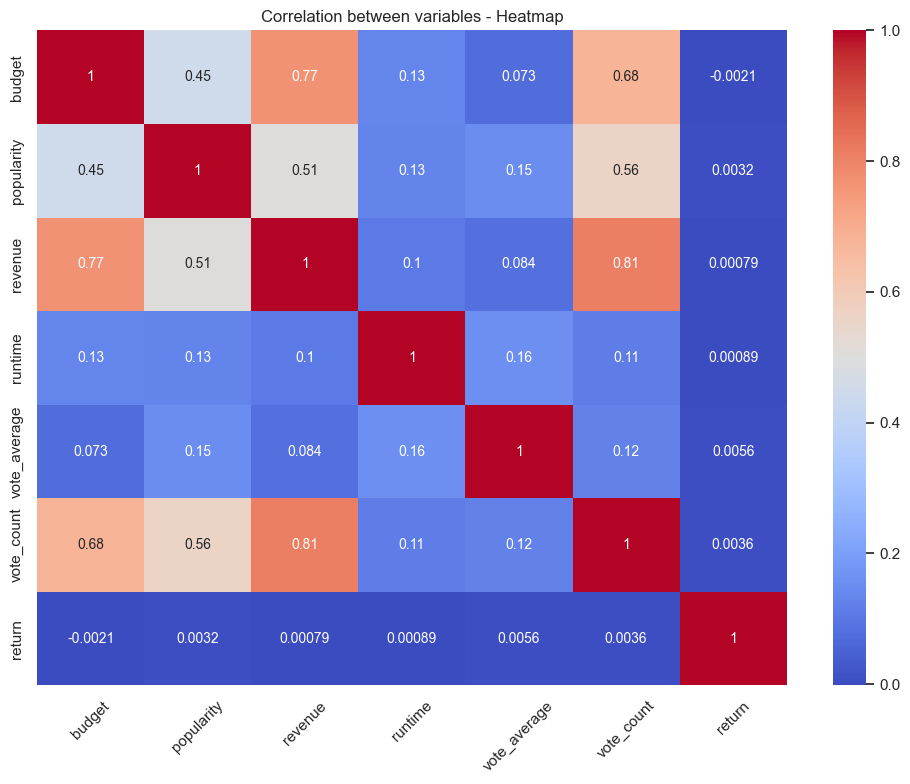

In [25]:
plt.figure(figsize=(10, 8))
plt.title("Correlation between variables - Heatmap")
ax = sns.heatmap(data=df_movies_corr.corr(), cmap="coolwarm", annot=True, annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

There is a correlation between votes and budget and revenue, usually the movies with more budget expend more in marketing and that influences the voting.

## Word Cloud

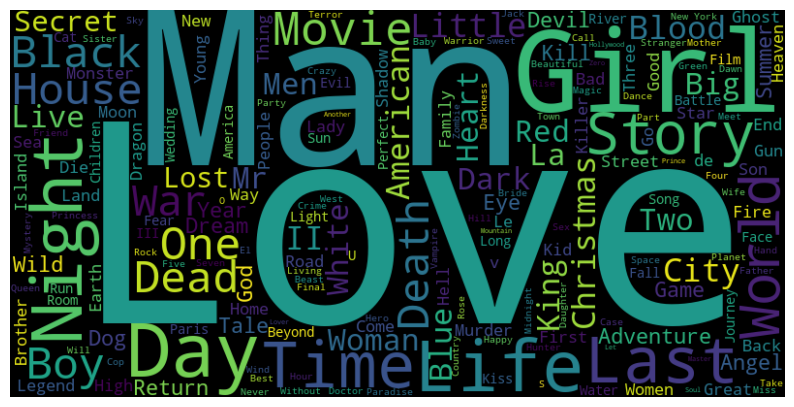

In [34]:
text = ' '.join(df_movies["title"])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

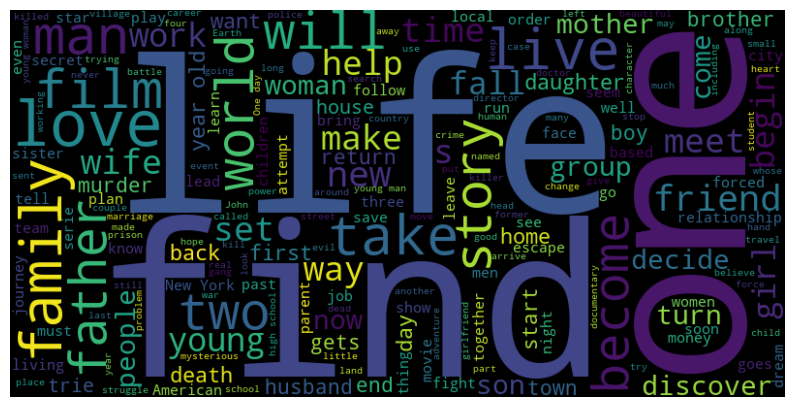

In [35]:
text = ' '.join(df_movies["overview"].fillna(""))
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
genres = [" ".join(x) for x in df_movies["genres_list"]]
directors = [" ".join(x) for x in df_movies["directors"]]

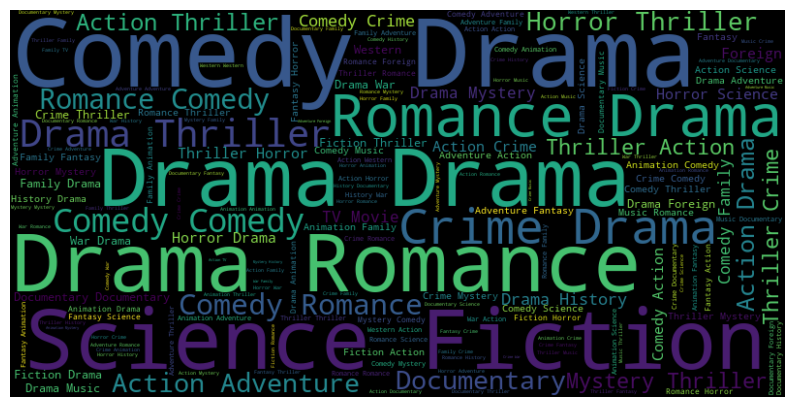

In [37]:
text = ' '.join(genres)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

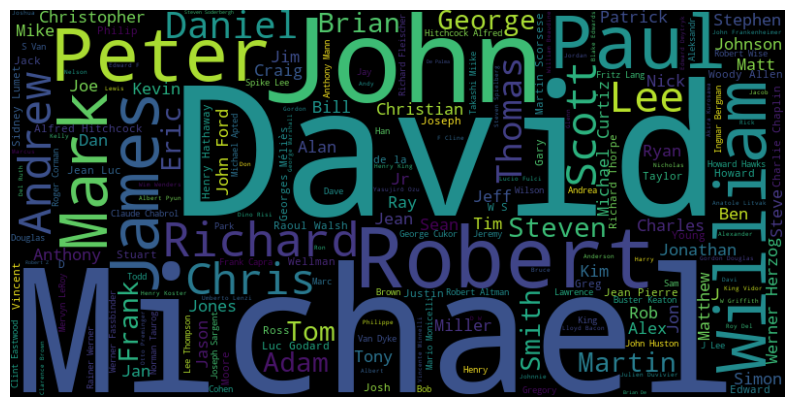

In [38]:
text = ' '.join(directors)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Setting up the training data

Due to lack of computanional resources we are obliged to use a smaller dataset for the recommendation model. Substantially reducing the amount of data can solve part of the problem with outliers and unprecise  registers.

In [4]:
df_train = df_movies[df_movies["vote_count"] > 100]

In [93]:
df_train.drop(columns="id").describe()

budget   popularity       revenue      runtime  vote_average  \
count  6.015000e+03  6015.000000  6.015000e+03  6015.000000   6015.000000   
mean   2.667112e+07    10.735684  7.972529e+07   106.328678      6.422178   
std    3.989800e+07    12.883339  1.599864e+08    25.583146      0.857817   
min    0.000000e+00     0.005007  0.000000e+00     0.000000      2.800000   
25%    0.000000e+00     6.770733  0.000000e+00    94.000000      5.800000   
50%    1.150000e+07     8.990345  2.021139e+07   103.000000      6.500000   
75%    3.500000e+07    11.935253  8.747210e+07   117.000000      7.100000   
max    3.800000e+08   547.488298  2.787965e+09   705.000000      9.100000   

         vote_count  release_year        return  
count   6015.000000   6015.000000  6.015000e+03  
mean     729.873815   2001.292269  1.755416e+03  
std     1174.274371     15.421579  1.111278e+05  
min      101.000000   1902.000000  0.000000e+00  
25%      162.000000   1996.000000  0.000000e+00  
50%      304.000000   2006.000000  9.500000e-01  
75%      728.000000   2012.000000  3.125000e+00  
max    14075.000000   2017.000000  8.500000e+06

In [96]:
df_train[df_train["return"] == 1018619.28] # real karate kid part 2 budget is 13 million dolars

budget    id original_language  \
2305   113.0  8856                en   

                                               overview  popularity  \
2305  Mr. Miyagi and Daniel take a trip to Okinawa t...    9.231318   

     release_date      revenue  runtime                    title  \
2305   1986-06-18  115103979.0    113.0  The Karate Kid, Part II   

      vote_average  ...                 collection  \
2305           5.9  ...  The Karate Kid Collection   

                                      genres_list spoken_languages_list  \
2305  [Adventure, Drama, Action, Romance, Family]                  [en]   

                              production_companies_list  \
2305  [Columbia Pictures Corporation, Delphi V Produ...   

     production_countries_list release_year      return  release_month  \
2305                      [US]         1986  1018619.28          junio   

     release_day           directors  
2305   miércoles  [John G. Avildsen]  

[1 rows x 21 columns]

In [27]:
df_train.isna().mean()

budget                       0.000000
id                           0.000000
original_language            0.000000
overview                     0.001829
popularity                   0.000000
release_date                 0.000000
revenue                      0.000000
runtime                      0.000000
title                        0.000000
vote_average                 0.000000
vote_count                   0.000000
collection                   0.746467
genres_list                  0.000000
spoken_languages_list        0.000000
production_companies_list    0.000000
production_countries_list    0.000000
release_year                 0.000000
return                       0.000000
release_month                0.000000
release_day                  0.000000
directors                    0.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of runtime')

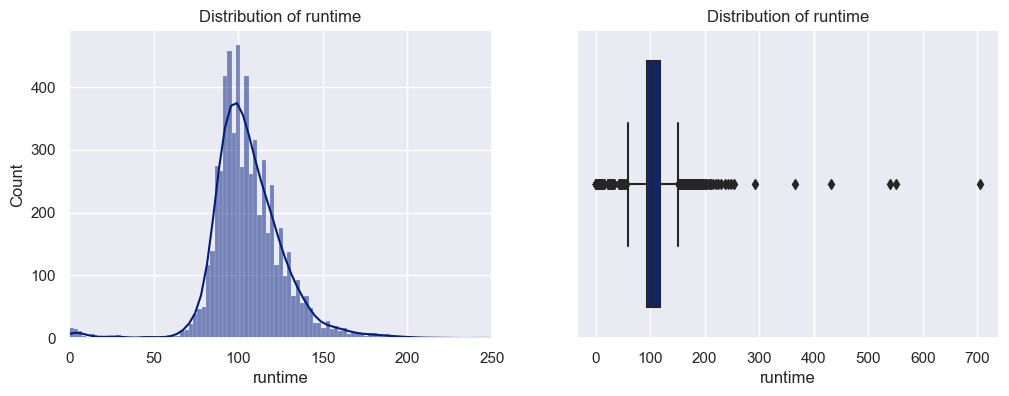

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df_train, x="runtime", ax=ax[0], kde=True)
ax[0].set_xlabel('runtime')
ax[0].set_title('Distribution of runtime')
ax[0].set_xlim(0, 250)

sns.boxplot(data=df_train, x="runtime", ax=ax[1])
ax[1].set_xlabel('runtime')
ax[1].set_title('Distribution of runtime')

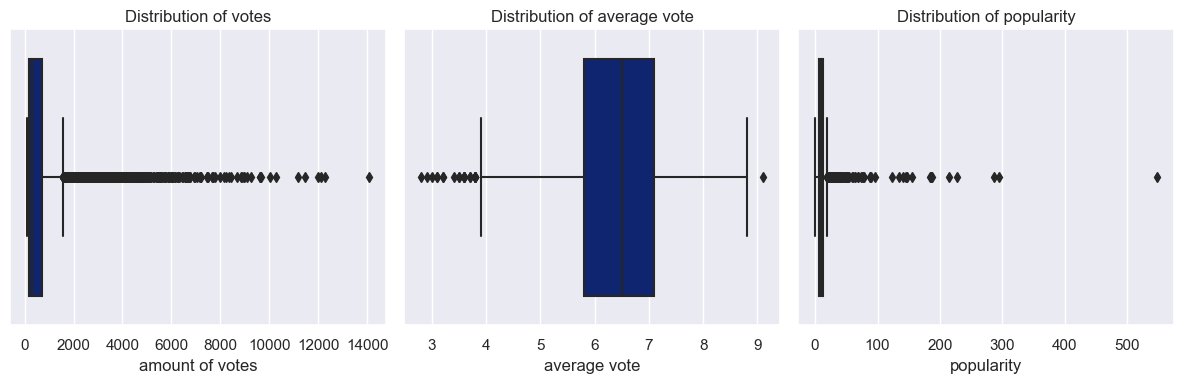

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(data=df_train, x="vote_count", ax=ax[0])
ax[0].set_xlabel('amount of votes')
ax[0].set_title('Distribution of votes')

sns.boxplot(data=df_train, x="vote_average", ax=ax[1])
ax[1].set_xlabel('average vote')
ax[1].set_title('Distribution of average vote')

sns.boxplot(data=df_train, x="popularity", ax=ax[2])
ax[2].set_xlabel('popularity')
ax[2].set_title('Distribution of popularity')

plt.tight_layout()
plt.show()

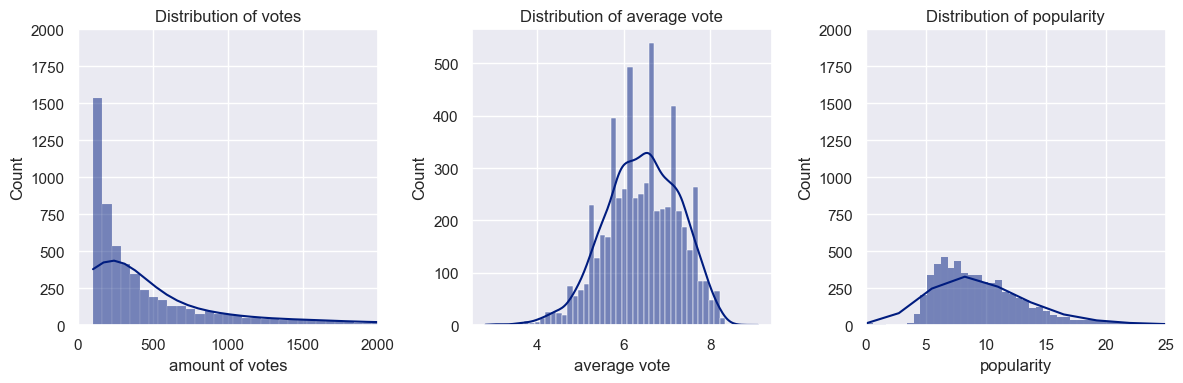

In [29]:

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=df_train, x="vote_count", ax=ax[0], kde=True)
ax[0].set_xlabel('amount of votes')
ax[0].set_title('Distribution of votes')
ax[0].set_xlim(0, 2000)
ax[0].set_ylim(0, 2000)

sns.histplot(data=df_train, x="vote_average", ax=ax[1], bins=50, kde=True)
ax[1].set_xlabel('average vote')
ax[1].set_title('Distribution of average vote')

sns.histplot(data=df_train, x="popularity", ax=ax[2], kde=True)
ax[2].set_xlabel('popularity')
ax[2].set_title('Distribution of popularity')
ax[2].set_xlim(0, 25)
ax[2].set_ylim(0, 2000)

plt.tight_layout()
plt.show()

In [30]:
genres = []
for genres_list in df_train['genres_list']:
    for genre in genres_list:
        genres.append(genre)

freq_genres = pd.Series(genres).value_counts()

languages = []
for languages_list in df_train['spoken_languages_list']:
    for language in languages_list:
        languages.append(language)

freq_languages = pd.Series(languages).value_counts()

countries = []
for countries_list in df_train['production_countries_list']:
    for country in countries_list:
        countries.append(country)

freq_countries = pd.Series(countries).value_counts()

companies = []
for companies_list in df_train['production_companies_list']:
    for companie in companies_list:
        companies.append(companie)

freq_companies = pd.Series(companies).value_counts()

In [31]:
# need the filter to plot them because there are a lot of languages, companies and countries with low frequecy

filter_languages = freq_languages[freq_languages >= 100]
filter_countries = freq_countries[freq_countries >= 100]
filter_companies = freq_companies[freq_companies >= 70]

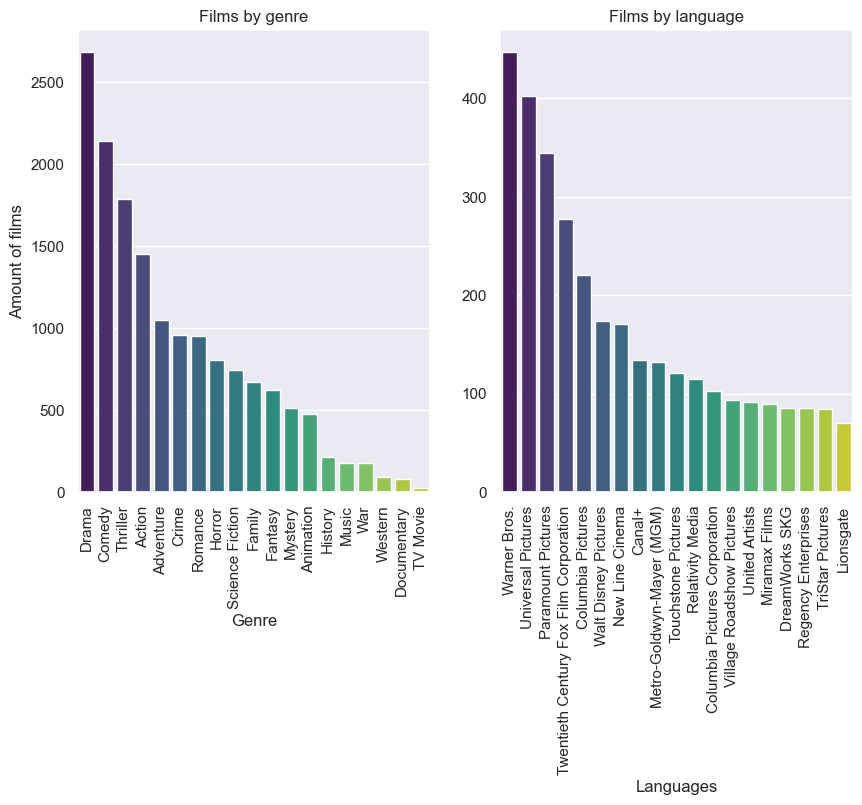

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=False)
sns.barplot(x=freq_genres.index, y=freq_genres.values, ax=ax[0], palette='viridis')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Amount of films')
ax[0].set_title('Films by genre')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.barplot(x=filter_companies.index, y=filter_companies.values, ax=ax[1], palette='viridis')
ax[1].set_xlabel('Languages')
ax[1].set_title('Films by language')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

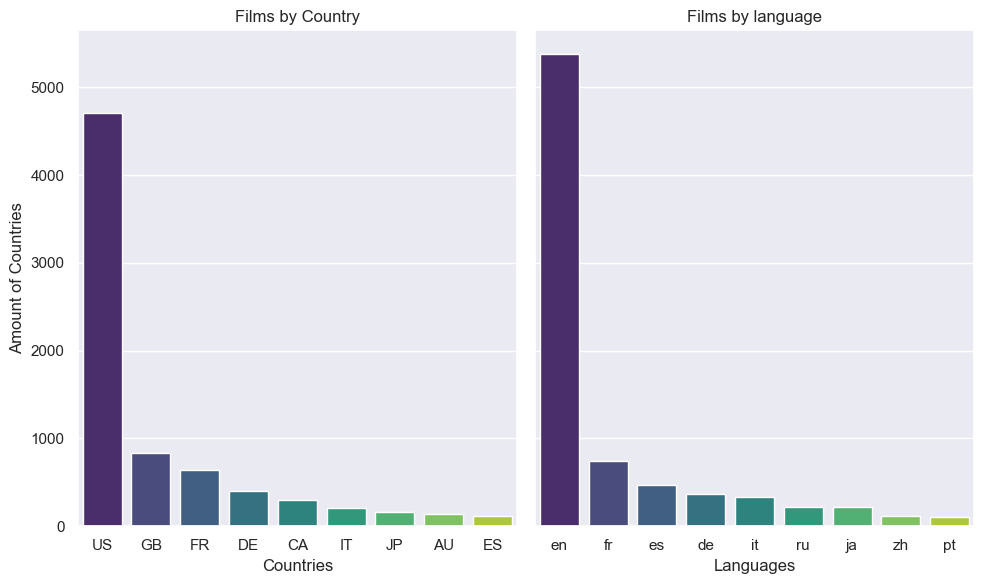

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

sns.barplot(x=filter_countries.index, y=filter_countries.values, ax=ax[0], palette='viridis')
ax[0].set_xlabel('Countries')
ax[0].set_ylabel('Amount of Countries')
ax[0].set_title('Films by Country')

sns.barplot(x=filter_languages.index, y=filter_languages.values, ax=ax[1], palette='viridis')
ax[1].set_xlabel('Languages')
ax[1].set_title('Films by language')

plt.tight_layout()
plt.show()


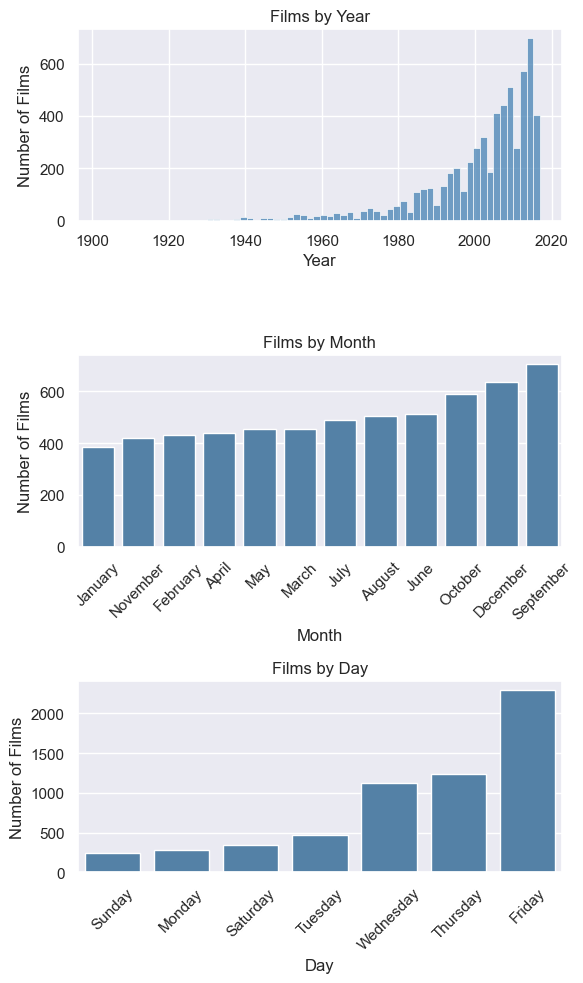

In [5]:
month_order = df_train['release_month'].value_counts().sort_values().index
day_order = df_train['release_day'].value_counts().sort_values().index


fig, ax = plt.subplots(3, 1, figsize=(6, 10), sharey=False)

sns.histplot(data=df_train, x="release_year", ax=ax[0], color="steelblue")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Films')
ax[0].set_title('Films by Year')

sns.countplot(data=df_train, x="release_month", ax=ax[1], order=month_order, color="steelblue")
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Films')
ax[1].set_title('Films by Month')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

sns.countplot(data=df_train, x="release_day", ax=ax[2], order=day_order, color="steelblue")
ax[2].set_xlabel('Day')
ax[2].set_ylabel('Number of Films')
ax[2].set_title('Films by Day')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [7]:
df_train_corr = df_train[numerical_columns.columns].drop(columns=["id", "release_year"])

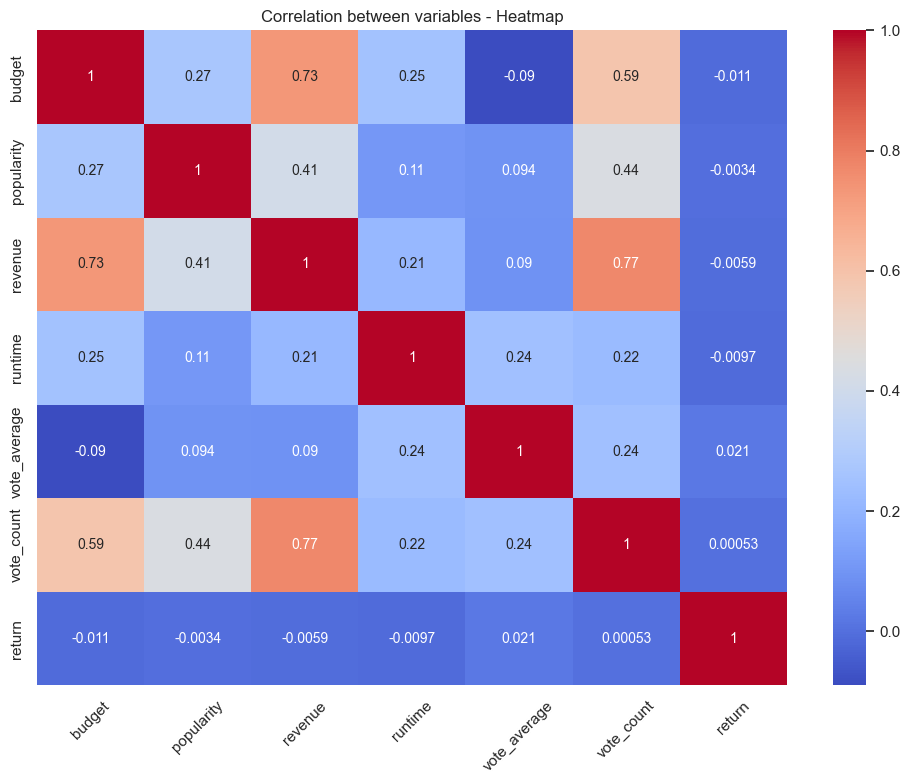

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Correlation between variables - Heatmap")
ax = sns.heatmap(data=df_train_corr.corr(), cmap="coolwarm", annot=True, annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

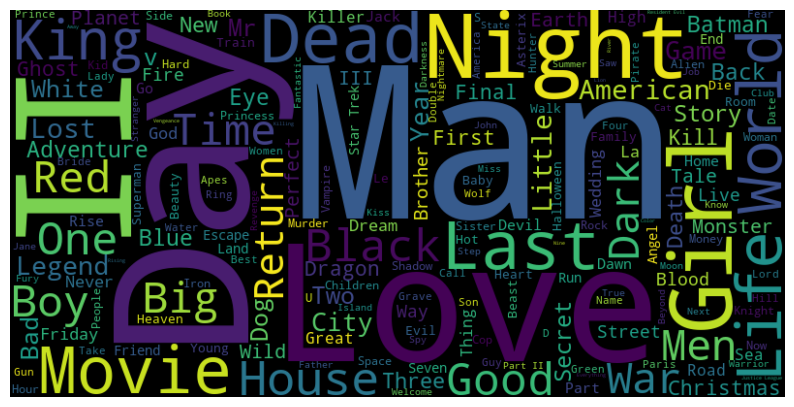

In [18]:
text = ' '.join(df_train["title"])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

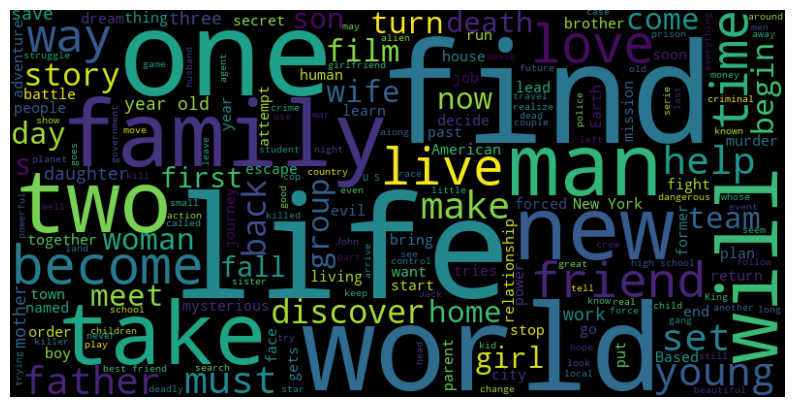

In [20]:
text = ' '.join(df_train["overview"].fillna(""))
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
genres = [" ".join(x) for x in df_train["genres_list"]]
directors = [" ".join(x) for x in df_train["directors"]]

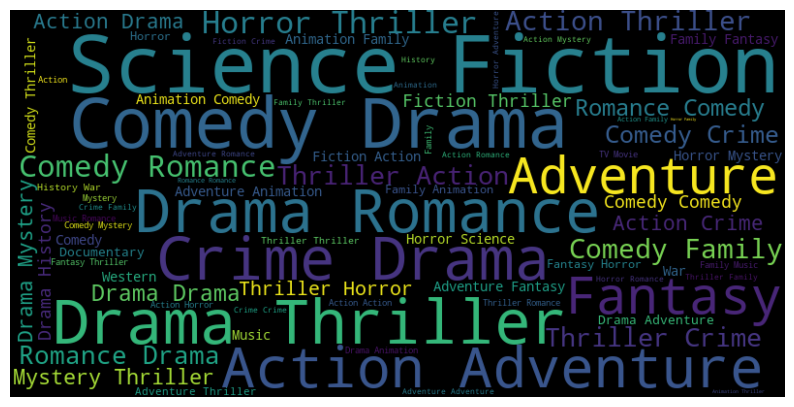

In [31]:
text = ' '.join(genres)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

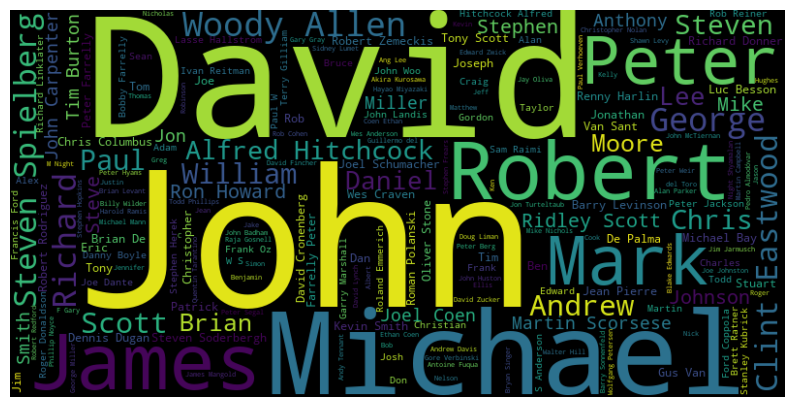

In [33]:
text = ' '.join(directors)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()